# Multivariate Linear Regression

In [1]:
# Import Essential Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
studydata = pd.read_csv('studydata.csv')
studydata.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
studydata['total_score'] = studydata['math_score'] + studydata['reading_score'] + studydata['writing_score']
studydata['mean_score'] = round(studydata['total_score'] / 3, 2)
studydata['median_score'] = studydata[['math_score', 'reading_score', 'writing_score']].median(axis=1)

studydata.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,mean_score,median_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67,72.0
1,female,group C,some college,standard,completed,69,90,88,247,82.33,88.0
2,female,group B,master's degree,standard,none,90,95,93,278,92.67,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33,47.0
4,male,group C,some college,standard,none,76,78,75,229,76.33,76.0


Response variable: total_score
Predictor Feature: reading_score, writing_score, math_score

In [4]:
# Extract Response and Predictors
y = pd.DataFrame(studydata["total_score"])
X = pd.DataFrame(studydata[["math_score", "reading_score", "writing_score"]])

In [5]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (750, 1) (750, 3)
Test Set  : (250, 1) (250, 3)


In [6]:
# Summary Statistics for Response
y_train.describe()

,total_score
count,750.000000
mean,204.332000
std,43.584002
min,27.000000
25%,176.000000
50%,207.000000
75%,234.000000
max,300.000000


In [7]:
# Summary Statistics for Predictors
X_train.describe()

,math_score,reading_score,writing_score
count,750.000000,750.00000,750.000000
mean,66.409333,69.54400,68.378667
std,15.659739,14.72707,15.324982
min,0.000000,17.00000,10.000000
25%,57.000000,60.00000,58.000000
50%,67.000000,71.00000,70.000000
75%,77.000000,80.00000,79.000000
max,100.000000,100.00000,100.000000


<Axes: >

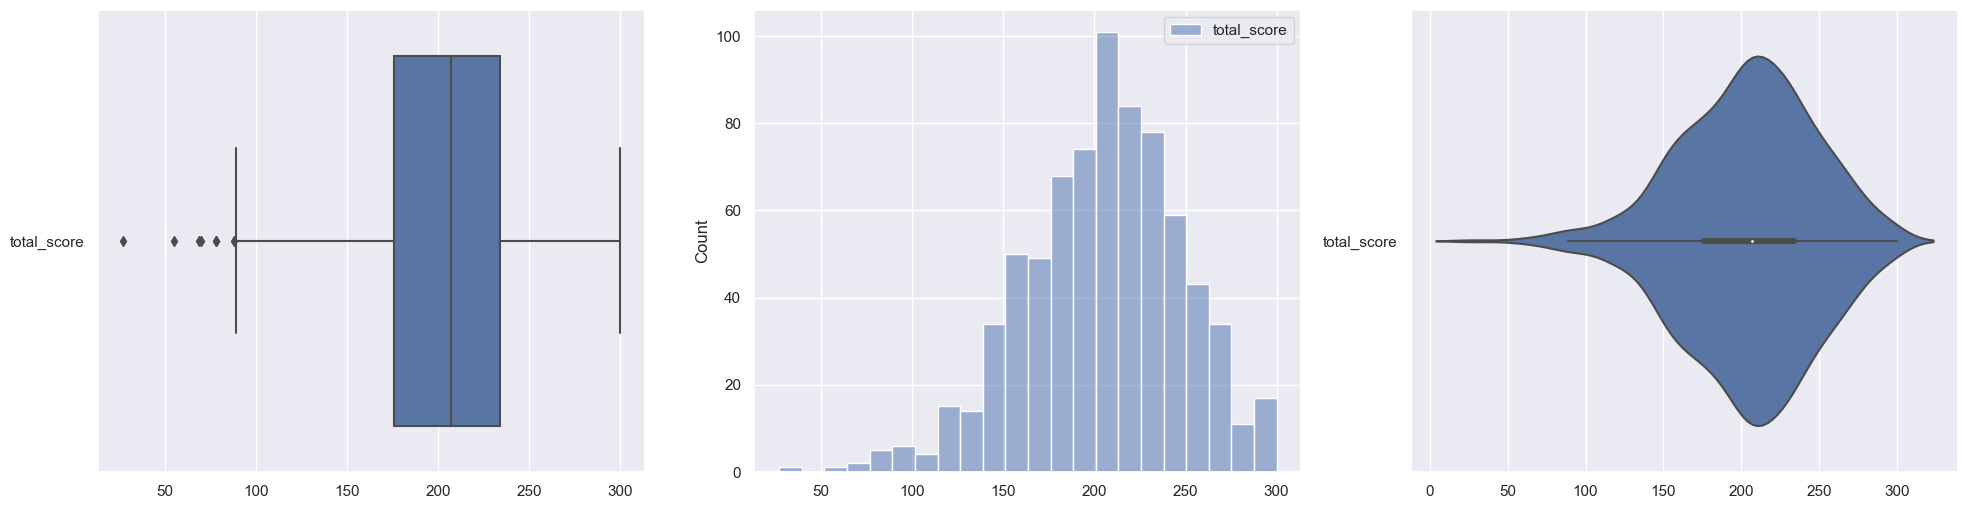

In [8]:
# Draw the distribution of Response
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y_train, orient = "h", ax = axes[0])
sb.histplot(data = y_train, ax = axes[1])
sb.violinplot(data = y_train, orient = "h", ax = axes[2])

<Axes: >

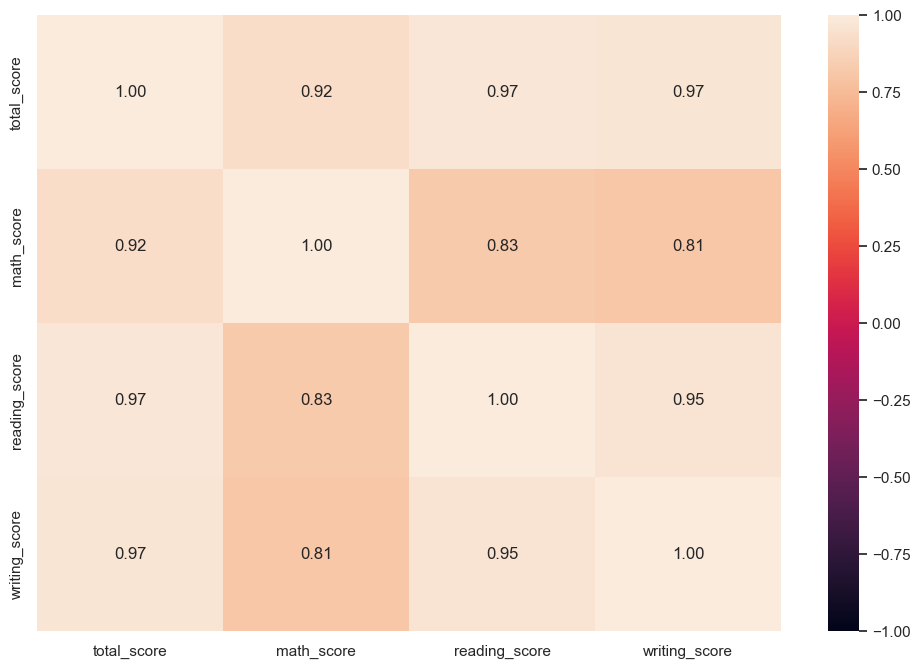

In [9]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

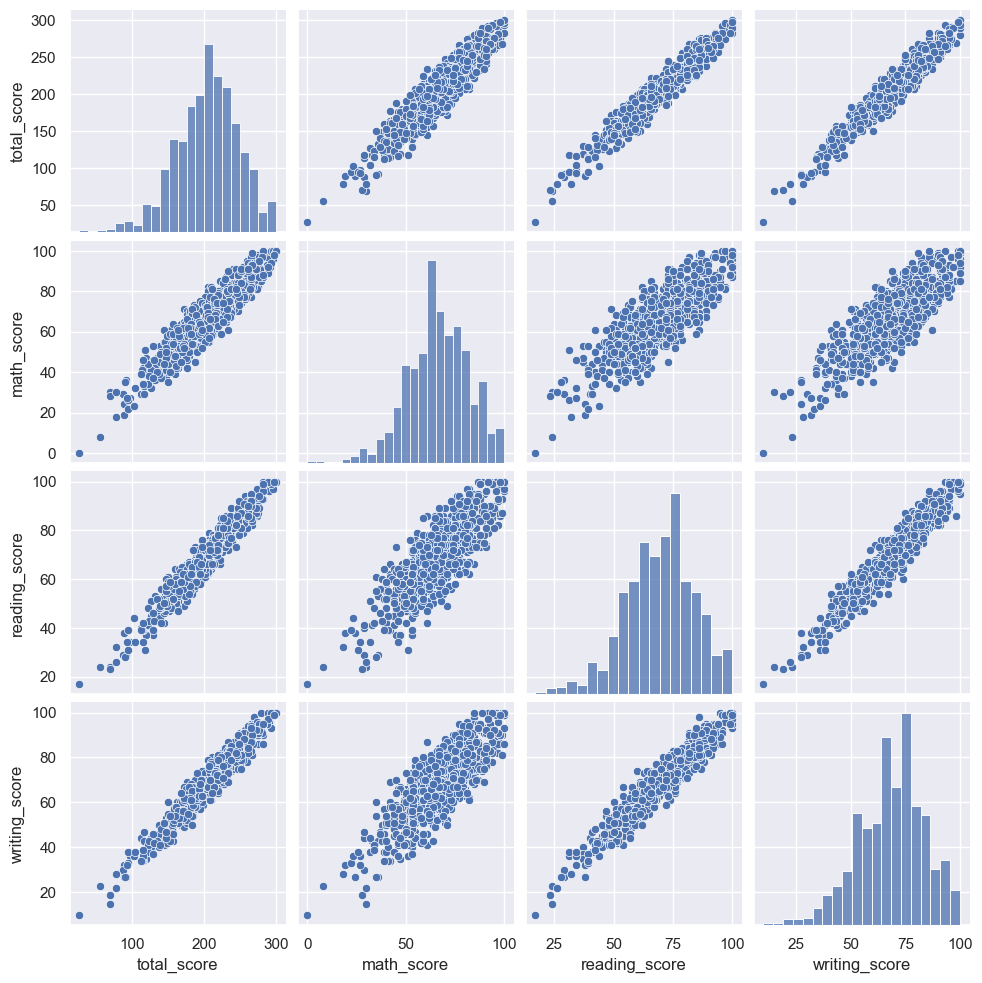

In [10]:
# Relationship between Response and the Predictors
sb.pairplot(data = trainDF)

In [11]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression


# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [5.68434189e-14]
Coefficients of Regression 	: a =  [[1. 1. 1.]]



,Predictors,Coefficients
0,math_score,1.0
1,reading_score,1.0
2,writing_score,1.0


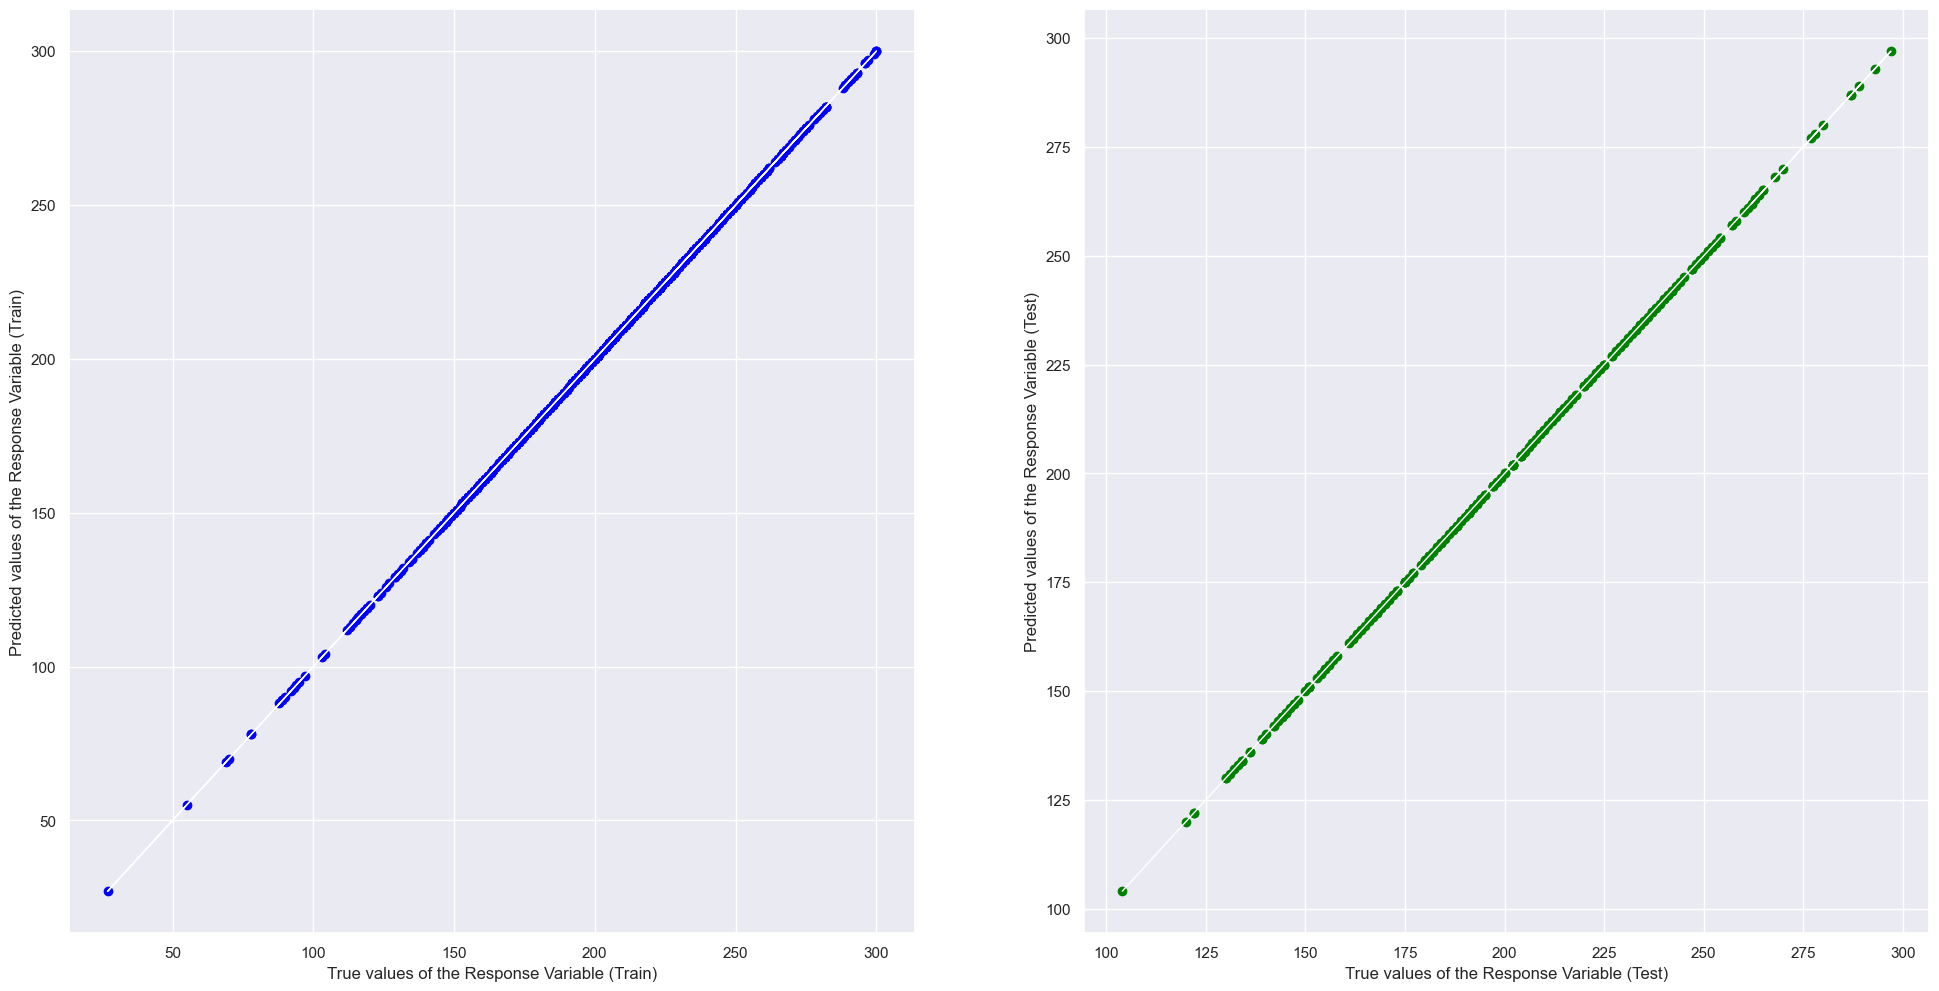

In [12]:
# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [13]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 2.999606778593987e-28

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 3.521979951885938e-28



Intercept of Regression 	: b =  [-1.42108547e-13]
Coefficients of Regression 	: a =  [[1. 1. 1.]]

      Predictors  Coefficients
0     math_score           1.0
1  reading_score           1.0
2  writing_score           1.0



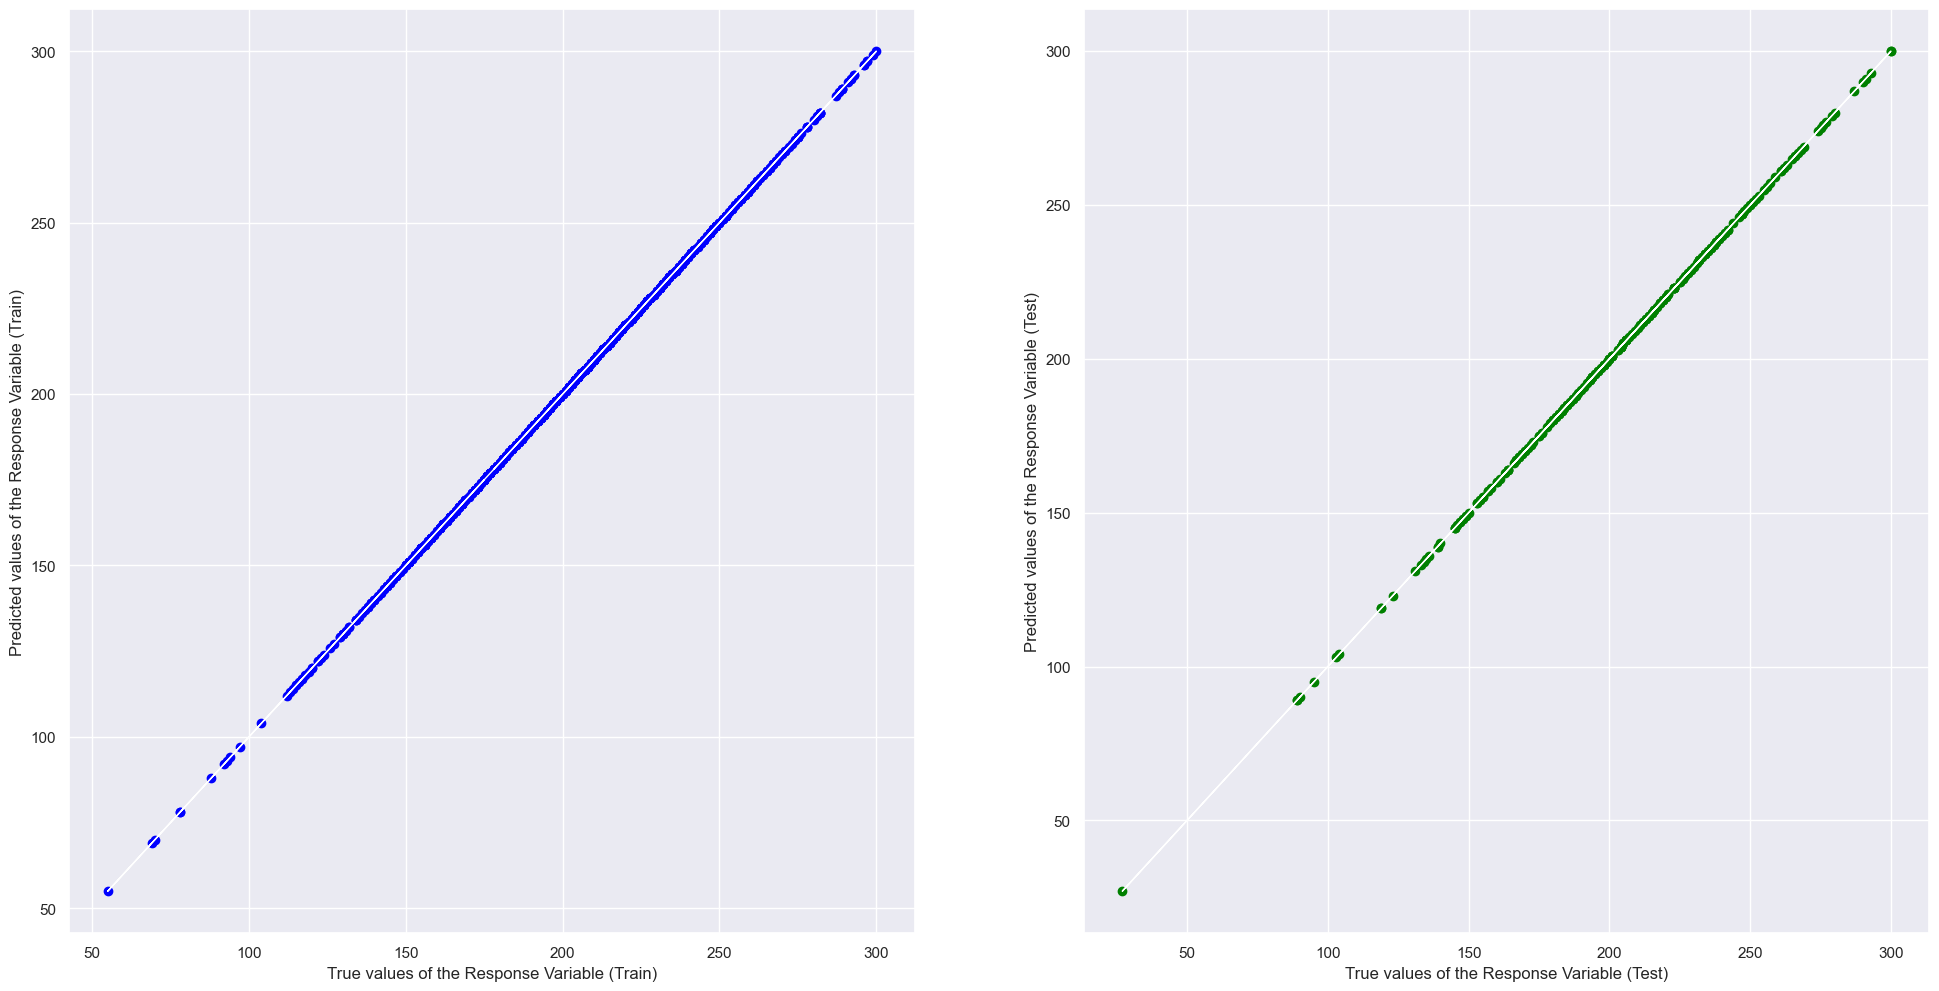

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 1.3824040575674623e-27

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 1.3062021977521931e-27



In [14]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
predictors = ["math_score", "reading_score", "writing_score"]

y = pd.DataFrame(studydata["total_score"])
X = pd.DataFrame(studydata[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

R-squared: 0.016869192414713297
Mean Squared Error: 1979.565010926866


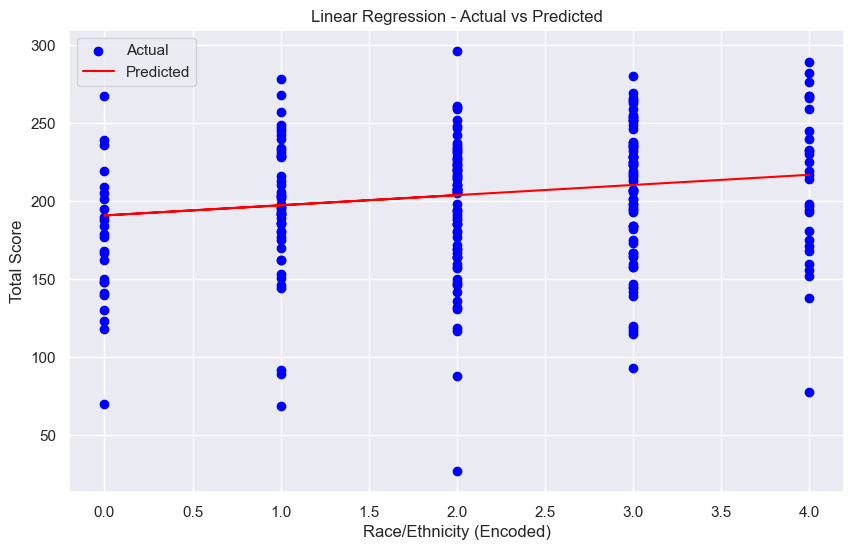

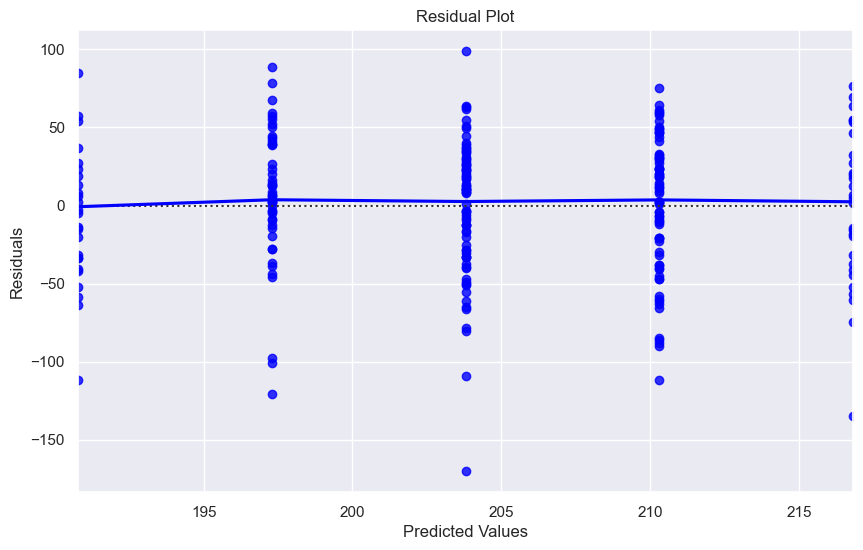

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
label_encoder = LabelEncoder()
studydata['race_ethnicity_encoded'] = label_encoder.fit_transform(studydata['race_ethnicity'])

# Define predictor (X) and response variable (y)
X = studydata[['race_ethnicity_encoded']]  # Predictor variable
y = studydata['total_score']  # Response variable

# Split the dataset into training and test sets (75% training, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r_squared)
print("Mean Squared Error:", mse)

# Plot regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Linear Regression - Actual vs Predicted')
plt.xlabel('Race/Ethnicity (Encoded)')
plt.ylabel('Total Score')
plt.legend()
plt.show()

# Residual plot
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sb.residplot(x=y_pred, y=residuals, lowess=True, color='blue')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
